<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45** minutes


In this lab, you will perform data wrangling tasks to prepare raw data for analysis. Data wrangling involves cleaning, transforming, and organizing data into a structured format suitable for analysis. This lab focuses on tasks like identifying inconsistencies, encoding categorical variables, and feature transformation.


## Objectives


After completing this lab, you will be able to:


- Identify and remove inconsistent data entries.

- Encode categorical variables for analysis.

- Handle missing values using multiple imputation strategies.

- Apply feature scaling and transformation techniques.


#### Intsall the required libraries


In [1]:
!pip install pandas
!pip install matplotlib

## Tasks


#### Step 1: Import the necessary module.


### 1. Load the Dataset


<h5>1.1 Import necessary libraries and load the dataset.</h5>


Ensure the dataset is loaded correctly by displaying the first few rows.


In [2]:
# Import necessary libraries
import pandas as pd

# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

#### 2. Explore the Dataset


<h5>2.1 Summarize the dataset by displaying the column data types, counts, and missing values.</h5>


In [3]:
# Write your code here
#Option 1

# --- Question 2.1: Summarize the dataset ---

# 1. Column data types and non-null counts
print("=== Dataset Info ===")
print(df.info())

# 2. Count of missing values per column
print("\n=== Missing Values Summary ===")
missing_summary = df.isna().sum().sort_values(ascending=False)
print(missing_summary)

# 3. Quick overview of numeric columns
print("\n=== Numeric Columns Summary ===")
print(df.describe())

# 4. Quick overview of all columns (including object types)
print("\n=== All Columns Summary (including categorical) ===")
print(df.describe(include="all"))

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None

=== Missing Values Summary ===
AINextMuch less integrated    64289
AINextLess integrated         63082
AINextNo change               52939
AINextMuch more integrated    51999
EmbeddedAdmired               48704
                              ...  
MainBranch                        0
Check                             0
Employment                        0
Age                               0
ResponseId                        0
Length: 114, dtype: int64

=== Numeric Columns Summary ===
         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000

In [4]:
# Option 2

# --- Question 2.1: Compact Summary DataFrame ---

# Create a summary with dtype, non-null count, missing count, and % missing
summary = pd.DataFrame({
    "dtype": df.dtypes,
    "non_null_count": df.notna().sum(),
    "missing_count": df.isna().sum(),
    "missing_%": (df.isna().mean() * 100).round(2)
})

# Reset index so column names are visible
summary = summary.reset_index().rename(columns={"index": "column"})

print("=== Dataset Summary ===")
print(summary.head(15))   # show first 15 rows for readability


=== Dataset Summary ===
              column   dtype  non_null_count  missing_count  missing_%
0         ResponseId   int64           65437              0       0.00
1         MainBranch  object           65437              0       0.00
2                Age  object           65437              0       0.00
3         Employment  object           65437              0       0.00
4         RemoteWork  object           54806          10631      16.25
5              Check  object           65437              0       0.00
6   CodingActivities  object           54466          10971      16.77
7            EdLevel  object           60784           4653       7.11
8          LearnCode  object           60488           4949       7.56
9    LearnCodeOnline  object           49237          16200      24.76
10           TechDoc  object           40897          24540      37.50
11         YearsCode  object           59869           5568       8.51
12      YearsCodePro  object           51610         

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


<h5><2.2 Generate basic statistics for numerical columnsh5>


In [6]:
# Write your code here
# 2.2
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


In [7]:
# Option 2
# --- Question 2.2: Basic statistics for numerical columns ---

# Summary statistics only for numeric columns
num_summary = df.describe()

print("=== Basic Statistics for Numerical Columns ===")
print(num_summary)

=== Basic Statistics for Numerical Columns ===
         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.000000   1.100000e+05      9.000000       10.000000   
75%    49078.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29393.000000    29411.000000    29450.000000     29448.00000   
mean         7.522140       10.060857       24.343232        22.96522   
std         18.422661       21.833836       27.089360        27.01774   
min          0.000000        0.000000        0.0

### 3. Identifying and Removing Inconsistencies


<h5>3.1 Identify inconsistent or irrelevant entries in specific columns (e.g., Country).</h5>


In [8]:
# Write your code here
# --- Section 3.1: Identify inconsistent or irrelevant entries in 'Country' ---

# Step 1: Check unique values in Country column
unique_countries = df['Country'].unique()
print("Number of unique country entries:", len(unique_countries))
print("\nSample unique country entries:")
print(unique_countries[:50])  # show first 50 for readability

# Step 2: Look at most frequent countries
print("\nTop 20 most common country entries:")
print(df['Country'].value_counts().head(20))

# Step 3: Look for suspicious entries
# (very short, unusual strings, or missing/invalid)
suspicious_entries = df['Country'].value_counts().tail(20)
print("\nPotential inconsistent/irrelevant country entries:")
print(suspicious_entries)


Number of unique country entries: 186

Sample unique country entries:
['United States of America'
 'United Kingdom of Great Britain and Northern Ireland' 'Canada' 'Norway'
 'Uzbekistan' 'Serbia' 'Poland' 'Philippines' 'Bulgaria' 'Switzerland'
 'India' 'Germany' 'Ireland' 'Italy' 'Ukraine' 'Australia' 'Brazil'
 'Japan' 'Austria' 'Iran, Islamic Republic of...' 'France' 'Saudi Arabia'
 'Romania' 'Turkey' 'Nepal' 'Algeria' 'Sweden' 'Netherlands' 'Croatia'
 'Pakistan' 'Czech Republic' 'Republic of North Macedonia' 'Finland'
 'Slovakia' 'Russian Federation' 'Greece' 'Israel' 'Belgium' 'Mexico'
 'United Republic of Tanzania' 'Hungary' 'Argentina' 'Portugal'
 'Sri Lanka' 'Latvia' 'China' 'Singapore' 'Lebanon' 'Spain' 'South Africa']

Top 20 most common country entries:
Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain an

<h5>3.2 Standardize entries in columns like Country or EdLevel by mapping inconsistent values to a consistent format.</h5>


In [9]:
## Write your code here
# --- Section 3.2: Standardize entries in Country and EdLevel ---

# Step 1: Standardize Country names with a mapping dictionary
country_mapping = {
    "United States of America": "United States",
    "USA": "United States",
    "U.S.A": "United States",
    "us": "United States",
    "UK": "United Kingdom",
    "England": "United Kingdom",
    "Viet Nam": "Vietnam",
    "IR": "Iran",
    "N/A": None,
    "Unknown": None
}

df['Country'] = df['Country'].replace(country_mapping)

# Step 2: Standardize Education Level entries
edlevel_mapping = {
    "Bachelor’s degree": "Bachelors",
    "Bachelor’s Degree": "Bachelors",
    "B.Sc.": "Bachelors",
    "Master’s degree": "Masters",
    "Master’s Degree": "Masters",
    "M.Sc.": "Masters",
    "PhD": "Doctorate",
    "Doctoral degree": "Doctorate",
    "Some college": "College",
    "Secondary school": "High School"
}

df['EdLevel'] = df['EdLevel'].replace(edlevel_mapping)

# Step 3: Verify changes
print("\nUnique standardized Country entries:")
print(df['Country'].unique()[:20])

print("\nUnique standardized EdLevel entries:")
print(df['EdLevel'].unique()[:20])



Unique standardized Country entries:
['United States' 'United Kingdom of Great Britain and Northern Ireland'
 'Canada' 'Norway' 'Uzbekistan' 'Serbia' 'Poland' 'Philippines' 'Bulgaria'
 'Switzerland' 'India' 'Germany' 'Ireland' 'Italy' 'Ukraine' 'Australia'
 'Brazil' 'Japan' 'Austria' 'Iran, Islamic Republic of...']

Unique standardized EdLevel entries:
['Primary/elementary school'
 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'
 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
 'Some college/university study without earning a degree'
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Professional degree (JD, MD, Ph.D, Ed.D, etc.)'
 'Associate degree (A.A., A.S., etc.)' 'Something else' nan]


### 4. Encoding Categorical Variables


<h5>4.1 Encode the Employment column using one-hot encoding.</h5>


In [10]:
## Write your code here

# --- Section 4.1: One-hot encode Employment column and drop original ---

# Apply one-hot encoding
employment_dummies = pd.get_dummies(df['Employment'], prefix='Employment')

# Concatenate with the DataFrame
df = pd.concat([df, employment_dummies], axis=1)

# Drop the original Employment column
df.drop(columns=['Employment'], inplace=True)

# Verify
print("Columns after one-hot encoding Employment:")
print(df.columns[:20])  # show first 20 columns


Columns after one-hot encoding Employment:
Index(['ResponseId', 'MainBranch', 'Age', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize',
       'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse',
       'Country', 'Currency'],
      dtype='object')


### 5. Handling Missing Values


<h5>5.1 Identify columns with the highest number of missing values.</h5>


In [11]:
## Write your code here
# --- 5.1 Identify columns with the highest number of missing values ---
missing_summary = df.isnull().sum().sort_values(ascending=False)
print("Columns with the most missing values:")
print(missing_summary.head(10))  # show top 10 columns with missing values

Columns with the most missing values:
AINextMuch less integrated       64289
AINextLess integrated            63082
AINextNo change                  52939
AINextMuch more integrated       51999
EmbeddedAdmired                  48704
EmbeddedWantToWorkWith           47837
EmbeddedHaveWorkedWith           43223
ConvertedCompYearly              42002
AIToolNot interested in Using    41023
AINextMore integrated            41009
dtype: int64


<h5>5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.</h5>


In [12]:
## Write your code here
# --- 5.2 Impute missing values in numerical columns (e.g., ConvertedCompYearly) ---
if 'ConvertedCompYearly' in df.columns:
    mean_value = df['ConvertedCompYearly'].mean()
    df['ConvertedCompYearly'].fillna(mean_value, inplace=True)
    print("\nMissing values in 'ConvertedCompYearly' imputed with mean:", mean_value)


Missing values in 'ConvertedCompYearly' imputed with mean: 86155.28726264134


C:\Users\liyana_bh\AppData\Local\Temp\ipykernel_36140\2986378489.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(mean_value, inplace=True)


<h5>5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.</h5>


In [13]:
## Write your code here
# --- 5.3 Impute missing values in categorical columns (e.g., RemoteWork) ---
if 'RemoteWork' in df.columns:
    most_freq = df['RemoteWork'].mode()[0]  # most frequent value
    df['RemoteWork'].fillna(most_freq, inplace=True)
    print("\nMissing values in 'RemoteWork' imputed with most frequent value:", most_freq)


Missing values in 'RemoteWork' imputed with most frequent value: Hybrid (some remote, some in-person)


C:\Users\liyana_bh\AppData\Local\Temp\ipykernel_36140\801188276.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].fillna(most_freq, inplace=True)


In [14]:
# Option 2 for section 5
# --- 5.1 Identify columns with the highest number of missing values ---
missing_summary = df.isnull().sum().sort_values(ascending=False)
print("Columns with the most missing values:")
print(missing_summary.head(10))  # show top 10 columns with missing values


# --- 5.2 Impute missing values in numerical columns (e.g., ConvertedCompYearly) ---
if 'ConvertedCompYearly' in df.columns:
    print("\nMissing values in 'ConvertedCompYearly' BEFORE:", df['ConvertedCompYearly'].isnull().sum())
    mean_value = df['ConvertedCompYearly'].mean()
    df['ConvertedCompYearly'].fillna(mean_value, inplace=True)
    print("Missing values in 'ConvertedCompYearly' AFTER:", df['ConvertedCompYearly'].isnull().sum())


# --- 5.3 Impute missing values in categorical columns (e.g., RemoteWork) ---
if 'RemoteWork' in df.columns:
    print("\nMissing values in 'RemoteWork' BEFORE:", df['RemoteWork'].isnull().sum())
    most_freq = df['RemoteWork'].mode()[0]  # most frequent value
    df['RemoteWork'].fillna(most_freq, inplace=True)
    print("Missing values in 'RemoteWork' AFTER:", df['RemoteWork'].isnull().sum())


Columns with the most missing values:
AINextMuch less integrated       64289
AINextLess integrated            63082
AINextNo change                  52939
AINextMuch more integrated       51999
EmbeddedAdmired                  48704
EmbeddedWantToWorkWith           47837
EmbeddedHaveWorkedWith           43223
AIToolNot interested in Using    41023
AINextMore integrated            41009
Knowledge_9                      37802
dtype: int64

Missing values in 'ConvertedCompYearly' BEFORE: 0


C:\Users\liyana_bh\AppData\Local\Temp\ipykernel_36140\1212657845.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(mean_value, inplace=True)


Missing values in 'ConvertedCompYearly' AFTER: 0

Missing values in 'RemoteWork' BEFORE: 0
Missing values in 'RemoteWork' AFTER: 0


### 6. Feature Scaling and Transformation


<h5>6.1 Apply Min-Max Scaling to normalize the `ConvertedCompYearly` column.</h5>


In [15]:
## Write your code here
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# --- 6.1 Min-Max Scaling ---
if 'ConvertedCompYearly' in df.columns:
    # Reshape for sklearn (expects 2D array)
    scaler = MinMaxScaler()
    df['ConvertedCompYearly_MinMax'] = scaler.fit_transform(df[['ConvertedCompYearly']])
    
    print("Min-Max Scaling applied. Sample values:")
    print(df[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax']].head())

Min-Max Scaling applied. Sample values:
   ConvertedCompYearly  ConvertedCompYearly_MinMax
0         86155.287263                      0.0053
1         86155.287263                      0.0053
2         86155.287263                      0.0053
3         86155.287263                      0.0053
4         86155.287263                      0.0053


<h5>6.2 Log-transform the ConvertedCompYearly column to reduce skewness.</h5>


In [16]:
## Write your code here
# --- 6.2 Log Transformation ---
if 'ConvertedCompYearly' in df.columns:
    # Apply log transform (add 1 to avoid log(0) issue)
    df['ConvertedCompYearly_Log'] = np.log1p(df['ConvertedCompYearly'])
    
    print("\nLog Transformation applied. Sample values:")
    print(df[['ConvertedCompYearly', 'ConvertedCompYearly_Log']].head())


Log Transformation applied. Sample values:
   ConvertedCompYearly  ConvertedCompYearly_Log
0         86155.287263                11.363918
1         86155.287263                11.363918
2         86155.287263                11.363918
3         86155.287263                11.363918
4         86155.287263                11.363918


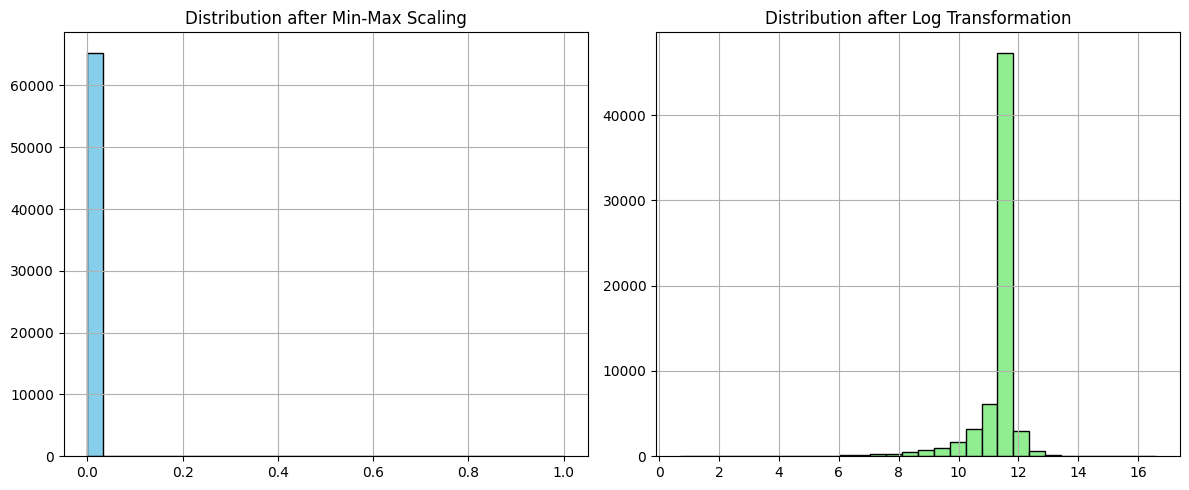

In [17]:
# --- Optional: Visualize distributions ---
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
df['ConvertedCompYearly_MinMax'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution after Min-Max Scaling")

plt.subplot(1,2,2)
df['ConvertedCompYearly_Log'].hist(bins=30, color='lightgreen', edgecolor='black')
plt.title("Distribution after Log Transformation")

plt.tight_layout()
plt.show()

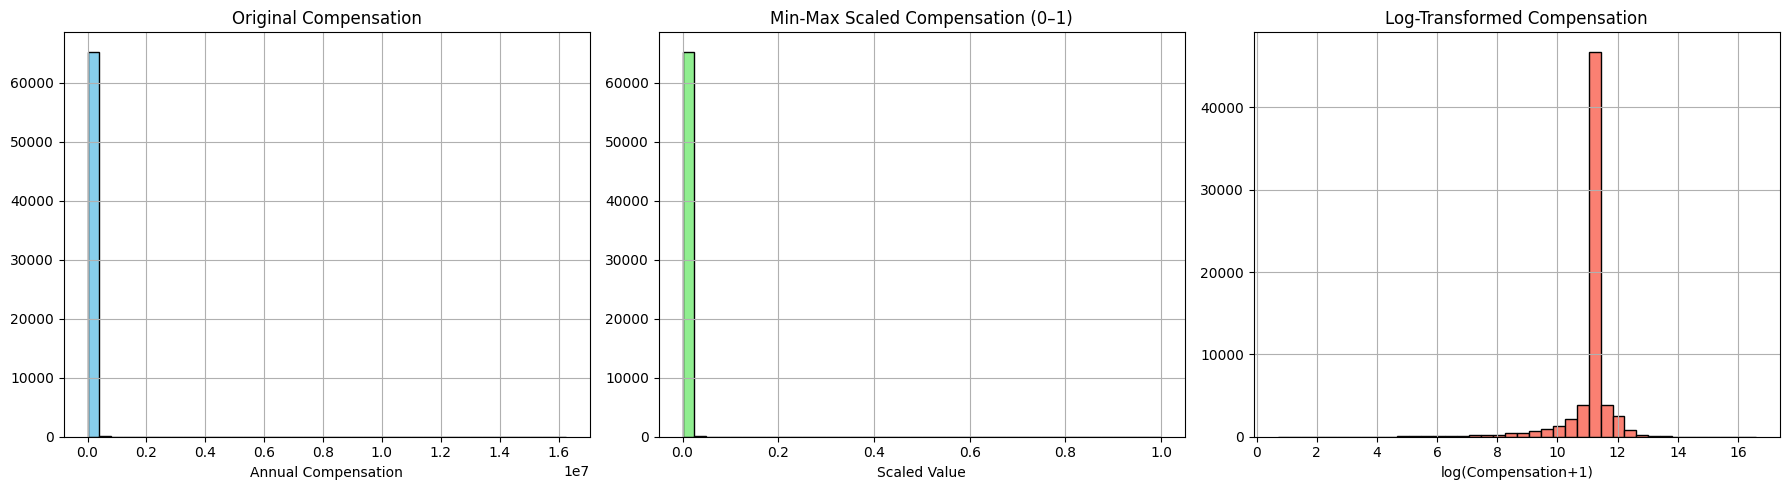

In [18]:
# %%
# Compare Original vs Min-Max vs Log Transformation
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
df['ConvertedCompYearly'].dropna().hist(bins=40, color='skyblue', edgecolor='black')
plt.title("Original Compensation")
plt.xlabel("Annual Compensation")

plt.subplot(1,3,2)
df['ConvertedCompYearly_MinMax'].dropna().hist(bins=40, color='lightgreen', edgecolor='black')
plt.title("Min-Max Scaled Compensation (0–1)")
plt.xlabel("Scaled Value")

plt.subplot(1,3,3)
df['ConvertedCompYearly_Log'].dropna().hist(bins=40, color='salmon', edgecolor='black')
plt.title("Log-Transformed Compensation")
plt.xlabel("log(Compensation+1)")

plt.tight_layout()
plt.show()

### 7. Feature Engineering


<h5>7.1 Create a new column `ExperienceLevel` based on the `YearsCodePro` column:</h5>


In [19]:
## Write your code here
# %%
# --- 7.1 Create ExperienceLevel column based on YearsCodePro ---

# First, ensure YearsCodePro is numeric (it sometimes has "Less than 1 year" or "More than 50 years")
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Define a function to classify experience level
def categorize_experience(years):
    if pd.isna(years):
        return "Unknown"
    elif years <= 2:
        return "Beginner"
    elif years <= 5:
        return "Intermediate"
    elif years <= 10:
        return "Experienced"
    else:
        return "Expert"

# Apply function
df['ExperienceLevel'] = df['YearsCodePro'].apply(categorize_experience)

# Check sample values
print(df[['YearsCodePro', 'ExperienceLevel']].head(15))

    YearsCodePro ExperienceLevel
0            NaN         Unknown
1           17.0          Expert
2           27.0          Expert
3            NaN         Unknown
4            NaN         Unknown
5            NaN         Unknown
6            7.0     Experienced
7            NaN         Unknown
8            NaN         Unknown
9           11.0          Expert
10           NaN         Unknown
11          25.0          Expert
12          12.0          Expert
13           NaN         Unknown
14          10.0     Experienced


C:\Users\liyana_bh\AppData\Local\Temp\ipykernel_36140\2063425941.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='ExperienceLevel', order=df['ExperienceLevel'].value_counts().index, palette='viridis')


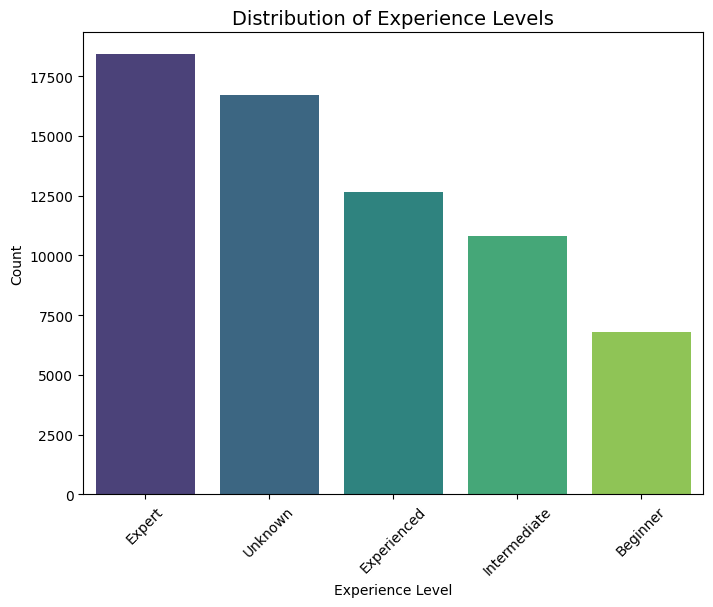

In [20]:
# %%
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot for ExperienceLevel
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='ExperienceLevel', order=df['ExperienceLevel'].value_counts().index, palette='viridis')

plt.title("Distribution of Experience Levels", fontsize=14)
plt.xlabel("Experience Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

C:\Users\liyana_bh\AppData\Local\Temp\ipykernel_36140\3729495211.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=exp_pct.index, y=exp_pct.values, palette='magma')


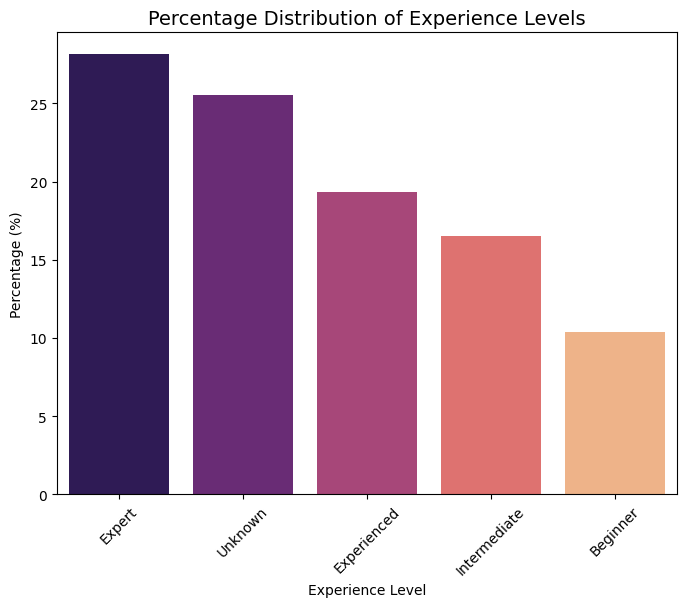

=== Percentage Distribution of Experience Levels ===
ExperienceLevel
Expert          28.13
Unknown         25.57
Experienced     19.34
Intermediate    16.56
Beginner        10.40
Name: proportion, dtype: float64


In [21]:
# %%
# Percentage distribution of ExperienceLevel
exp_pct = df['ExperienceLevel'].value_counts(normalize=True) * 100

plt.figure(figsize=(8,6))
sns.barplot(x=exp_pct.index, y=exp_pct.values, palette='magma')

plt.title("Percentage Distribution of Experience Levels", fontsize=14)
plt.xlabel("Experience Level")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.show()

print("=== Percentage Distribution of Experience Levels ===")
print(exp_pct.round(2))

### Summary


In this lab, you:

- Explored the dataset to identify inconsistencies and missing values.

- Encoded categorical variables for analysis.

- Handled missing values using imputation techniques.

- Normalized and transformed numerical data to prepare it for analysis.

- Engineered a new feature to enhance data interpretation.


Copyright © IBM Corporation. All rights reserved.
